In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
cpi = pd.read_csv ('../dataset/Indicators/cpi_yoy.csv', encoding='unicode_escape')

In [13]:
def cleaned_indicator(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='pad', inplace=True)
    df.index.names = ['Year']
    df = df[(df.index >= '1971-08-04') & (df.index <= '2022-11-02')]
    return df

In [16]:
cpi = cleaned_indicator(cpi)



In [17]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

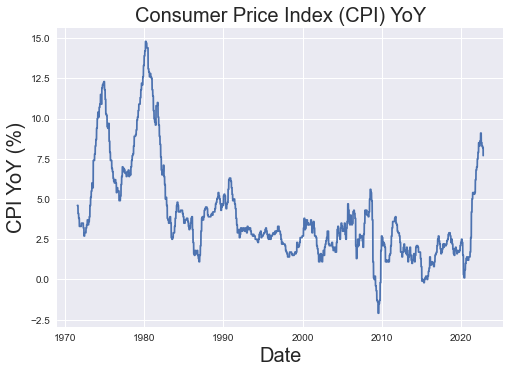

In [19]:
plt.plot(cpi, color= 'b')
plt.title('Consumer Price Index (CPI) YoY', fontsize= 20)
plt.xlabel('Date', fontsize= 20)
plt.ylabel('CPI YoY (%)', fontsize= 20)
plt.style.use('seaborn')

In [83]:
gdp = pd.read_csv ('./dataset/gdp.csv', encoding='unicode_escape')

In [84]:
gdp['time'] = gdp['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
gdp['time'] = pd.to_datetime(gdp["time"])
gdp.set_index('time', inplace=True)
gdp = gdp.reindex(pd.date_range(start=gdp.index.min(),
                                                  end=gdp.index.max(),
                                                  freq='1D'))

In [85]:
gdp.interpolate(method='linear', inplace=True)
gdp.index.names = ['Dates']

In [86]:
gdp = gdp[(gdp.index >= '1971-08-04') & (gdp.index <= '2022-11-02')]

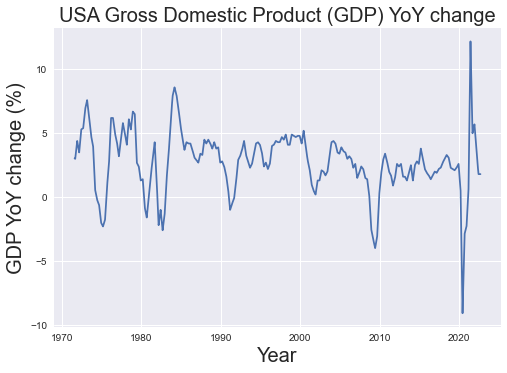

In [91]:
plt.plot(gdp, color= 'b')
plt.title('USA Gross Domestic Product (GDP) YoY change', fontsize= 20)
plt.xlabel('Year', fontsize= 20)
plt.ylabel('GDP YoY change (%)', fontsize= 20)
plt.style.use('seaborn')